<a href="https://colab.research.google.com/github/Sameersah/decision-trees-ensemble/blob/main/Gradient_Boosting_Machine_(GBM)_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Boosting Machine (GBM) Implementation

GBM builds an additive model in a forward stage-wise manner. The idea is to fit a sequence of weak learners (e.g., decision trees) to minimize a loss function.

Steps:
Define the Loss Function: Use Mean Squared Error for simplicity in regression tasks.
Initialize the Model: Start with a baseline model (e.g., the mean of the target variable for regression).
Iterative Training:
Compute residuals (errors) from the current model predictions.
Train a weak learner (decision tree) on the residuals.
Update the model by adding the predictions of the weak learner multiplied by a learning rate.
Repeat: Continue adding weak learners until convergence or a stopping criterion.

Regression Demonstration:

Regression Performance:
Custom GBM MSE: 1468.0310015741995
Scikit-learn GBM MSE: 1468.0310015741995
Custom GBM R2 Score: 0.9223676323494371
Scikit-learn GBM R2 Score: 0.9223676323494371


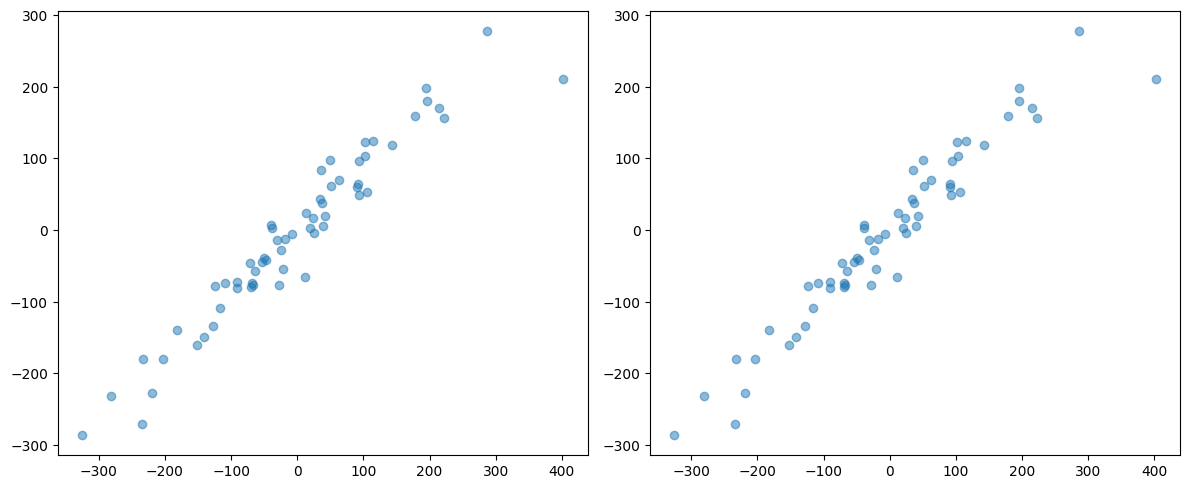

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, loss='mse'):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None
        self.loss = loss

    def _gradient(self, y, y_pred):
        # Different gradient calculations based on loss function
        if self.loss == 'mse':
            return y - y_pred  # Mean Squared Error gradient
        elif self.loss == 'mae':
            return np.where(y > y_pred, 1, -1)  # Mean Absolute Error gradient
        else:
            raise ValueError("Unsupported loss function")

    def fit(self, X, y):
        # Handle classification vs regression
        if self.loss in ['mse', 'mae']:
            # Regression
            self.initial_prediction = np.mean(y)
            current_prediction = np.full(shape=len(y), fill_value=self.initial_prediction)
        else:
            # Classification (using log-loss)
            self.initial_prediction = np.log(len(np.unique(y)))
            current_prediction = np.full(shape=len(y), fill_value=self.initial_prediction)

        # Create trees sequentially
        for _ in range(self.n_estimators):
            # Calculate residuals (gradients)
            residuals = self._gradient(y, current_prediction)

            # Fit a regression tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Calculate tree predictions (multiplied by learning rate)
            tree_predictions = tree.predict(X)

            # Update current predictions
            current_prediction += self.learning_rate * tree_predictions

            # Store the tree
            self.trees.append(tree)

        return self

    def predict(self, X):
        # Start with initial prediction
        predictions = np.full(shape=len(X), fill_value=self.initial_prediction)

        # Add predictions from each tree
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        return predictions

# Demonstration function with comparison
def demonstrate_gbm_comparison():
    # Regression Demonstration
    print("Regression Demonstration:")
    # Generate regression dataset
    X_reg, y_reg = make_regression(n_samples=300, n_features=4, noise=20, random_state=42)
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    # Custom GBM
    custom_gbm = GradientBoostingMachine(n_estimators=100, learning_rate=0.1, max_depth=3, loss='mse')
    custom_gbm.fit(X_train_reg, y_train_reg)
    y_pred_custom_reg = custom_gbm.predict(X_test_reg)

    # Scikit-learn GBM
    sklearn_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    sklearn_gbm.fit(X_train_reg, y_train_reg)
    y_pred_sklearn_reg = sklearn_gbm.predict(X_test_reg)

    # Regression Performance Comparison
    print("\nRegression Performance:")
    print("Custom GBM MSE:", mean_squared_error(y_test_reg, y_pred_custom_reg))
    print("Scikit-learn GBM MSE:", mean_squared_error(y_test_reg, y_pred_sklearn_reg))
    print("Custom GBM R2 Score:", r2_score(y_test_reg, y_pred_custom_reg))
    print("Scikit-learn GBM R2 Score:", r2_score(y_test_reg, y_pred_sklearn_reg))

    # Visualization for Regression
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.scatter(y_test_reg, y_pred_custom_reg, label='Custom GBM', alpha=0.5)
    plt.subplot(1,2,2)
    plt.scatter(y_test_reg, y_pred_sklearn_reg, label='Scikit-learn GBM', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Run the demonstration
demonstrate_gbm_comparison()